In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

from glob import glob

In [121]:
dino_files = glob('./imgs/dinos/*.jpg') #png gives an array of 0 and 1?

In [122]:
dino_img = glob('./imgs/dinos/dino-1.jpg')[0]

In [123]:
img_cv2 = cv.imread(dino_img)
img_mpl = plt.imread(dino_img)
img_cv2.shape, img_mpl.shape

((512, 512, 3), (512, 512, 3))

In [124]:
print(img_mpl.max())

255


In [125]:
img_mpl

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

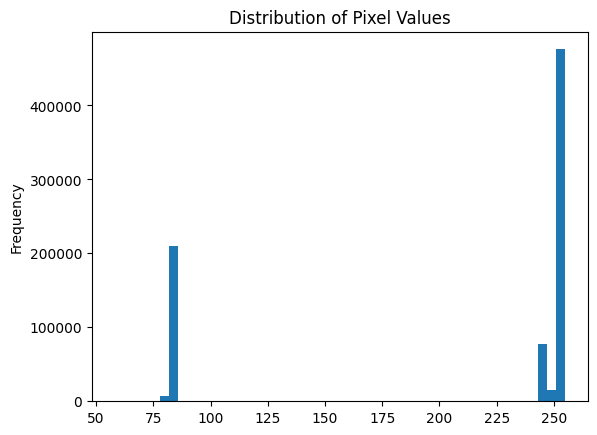

In [126]:
pd.Series(img_mpl.flatten()).plot(kind ='hist', bins=50, title='Distribution of Pixel Values')
plt.show()

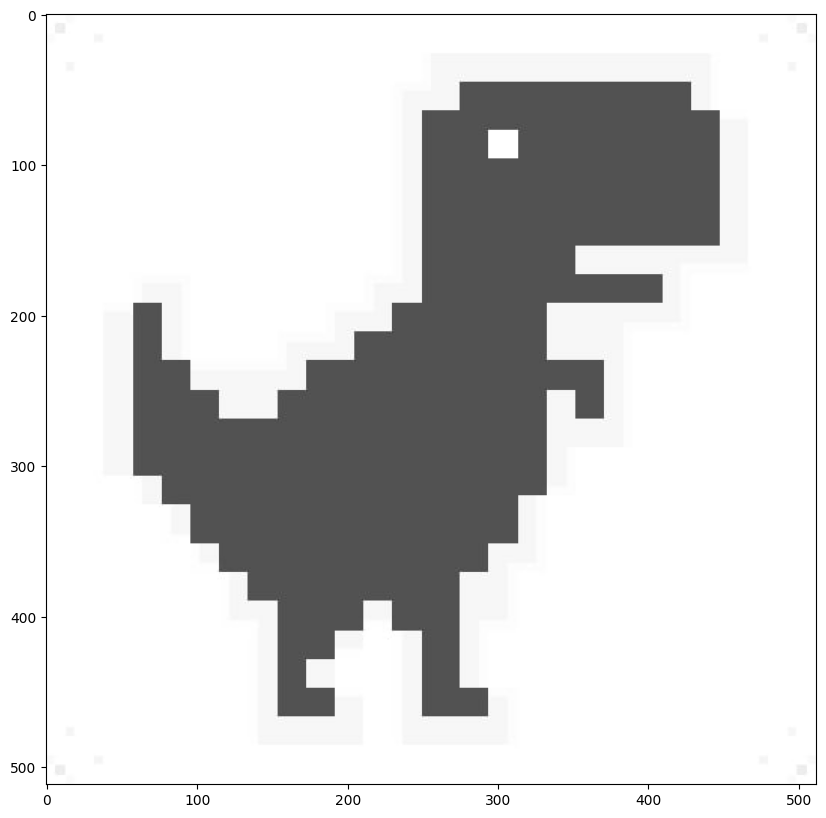

In [127]:
#Display Image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
plt.show()

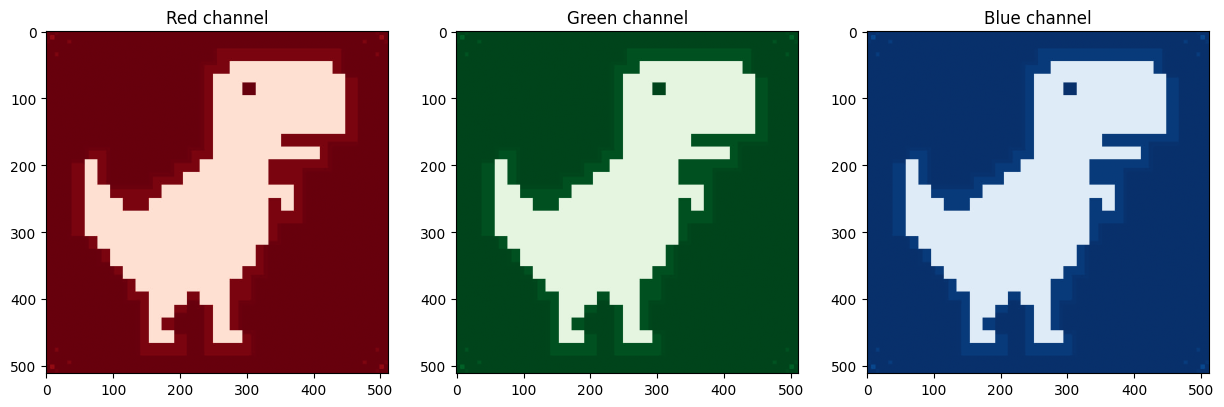

In [128]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap="Reds")
axs[1].imshow(img_mpl[:,:,1], cmap="Greens")
axs[2].imshow(img_mpl[:,:,2], cmap="Blues")

axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

# Matplotlib vs cv2 Numpy Arrays
- cv2 reads in channels as BGR
- matplotlib reads in channels as RGB

Text(0.5, 1.0, 'Matplotlib Image')

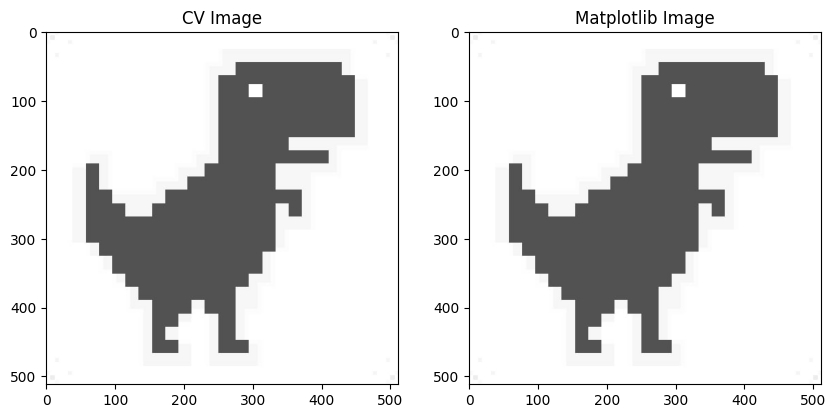

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].set_title('CV Image')
axs[1].set_title('Matplotlib Image')

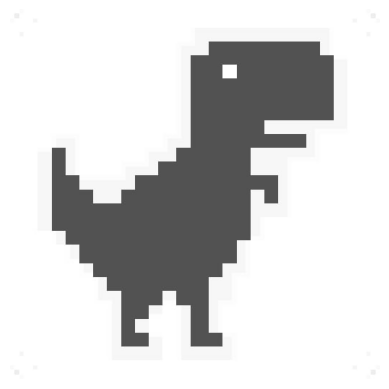

In [130]:
#Convertin from BGR to RGB
img_cv2_rgb = cv.cvtColor(img_cv2, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

# Image Manipulation

In [131]:
img = plt.imread(dino_img)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_gray.shape

(512, 512)

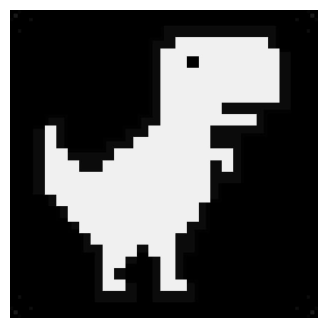

In [132]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
plt.show()

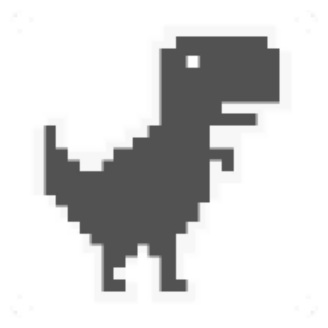

(128, 128, 3)


In [133]:
img_resized = cv.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(img_resized)
ax.axis('off')
plt.show()
print(img_resized.shape)

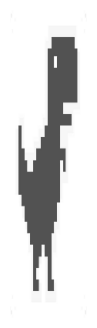

In [134]:
# Different proportions
img_stretched =  cv.resize(img, (100, 400))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(img_stretched)
ax.axis('off')
plt.show()


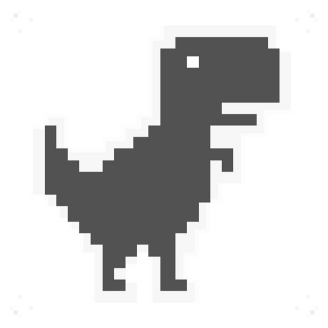

(5000, 5000, 3)


In [135]:
#Upscaling
img_upscaled = cv.resize(img, (5000, 5000), interpolation = cv.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(img_upscaled)
ax.axis('off')
plt.show()
print(img_upscaled.shape)

# CV2 Kernels
<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels">

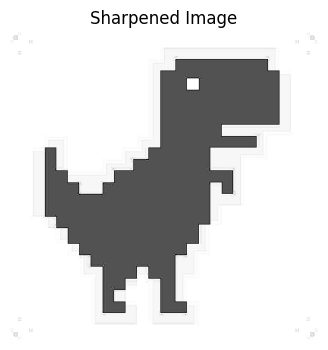

In [136]:
# Sharpen Image
kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
img_sharpened = cv.filter2D(img, -1, kernel_sharpening)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(img_sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

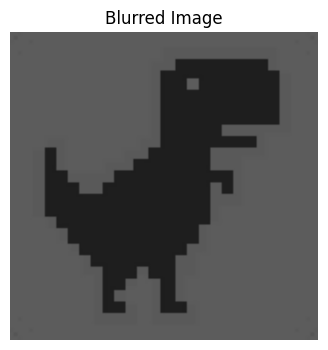

In [137]:
# Blurring the image
kernel_blurring = np.ones((3, 3), np.float32) / 25
blurred_image = cv.filter2D(img, -1, kernel_blurring)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(blurred_image)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

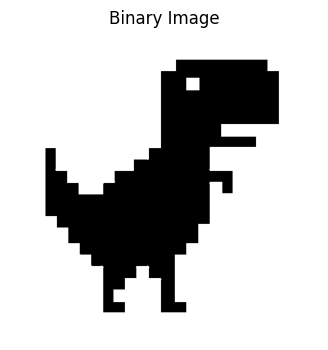

In [138]:
# Binary Image
_, binary_image = cv.threshold(blurred_image, 30, 255, cv.THRESH_BINARY)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(binary_image)
ax.axis('off')
ax.set_title('Binary Image')
plt.show()


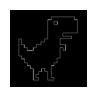

In [139]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred_image = cv.GaussianBlur(img_gray, (3, 3), 0)
image_resized = cv.resize(img_gray, None, fx=0.60, fy=0.60)

kernel_sharpening = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
img_sharpened = cv.filter2D(image_resized, -1, kernel_sharpening)

eightbit = np.uint8(np.absolute(img_sharpened))#8-bit vallues within range 0 to 255

_, binary = cv.threshold(eightbit, 30, 255, cv.THRESH_BINARY)

fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(binary, cmap='gray')
ax.axis('off')
plt.show()


3: area = 25587.0 aspect ratio = 0.924901185770751 perimeter = 1335.0538227558136


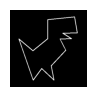

In [140]:
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for index, contour in enumerate(contours):
    x, y, w, h = cv.boundingRect(contour)
    
    area = cv.contourArea(contour)
    
    if area > 10:
        aspect_ratio = w / float(h)
        perimeter = cv.arcLength(contour, True)
        approx = cv.approxPolyDP(contour, 0.02 * perimeter, True)
        
        print(f"{index}: area = {area} aspect ratio = {aspect_ratio} perimeter = {perimeter}")
        
        canvas = np.zeros_like(binary)
        cv.drawContours(canvas, [approx], -1, (255, 255, 255), thickness=2)
        
        fig, ax = plt.subplots(figsize=(1, 1))
        ax.imshow(canvas, cmap='gray')
        ax.axis('off')
        plt.show()